# Lesson 6 - Vortex Lift

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [11]:
N = 200
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X, Y = np.meshgrid(x, y)

In [12]:
def get_velocity(strength, xd, yd, X, Y):
    u = -strength / (2 * math.pi) * ((X - xd)**2 - (Y - yd)**2) / ((X - xd)**2 + (Y - yd)**2)**2
    v = -strength / (2 * math.pi) * 2 * (X - xd) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)**2
    return u, v

def get_stream_function(strength, xd, yd, X, Y):
    psi = -strength / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    phi = strength / (2 * math.pi) * (X - xd) / ((X - xd)**2 + (Y - yd)**2)
    return psi, phi

In [13]:
kappa = 1.0 # doublet strength
x_doublet, y_doublet = 0.0, 0.0 # doublet position

In [14]:
# compute velocity field, potential, and streamlines on the mesh grid
u_doublet, v_doublet = get_velocity(kappa, x_doublet, y_doublet, X, Y)
psi_doublet, phi_doublet = get_stream_function(kappa, x_doublet, y_doublet, X, Y)

In [15]:
# calculate the velocity field for the horizontal free stream
u_inf = 1.0
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

# Calculate streamfunction and velocity potential for freestream
psi_freestream = u_inf * Y
phi_freestream = u_inf * X

In [16]:
# Superposition of doublet and freestream fields
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet
phi = phi_freestream + phi_doublet

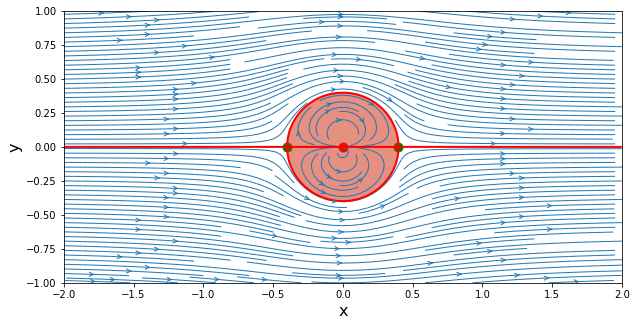

In [19]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.contour(X, Y, psi, levels=[0.], colors='red', linewidths=2, linestyles='solid')
plt.scatter(x_doublet, y_doublet, color='red', s=80, marker='o')

# Calculate cylinder radius and add to figure
R = math.sqrt(kappa/(2*math.pi*u_inf))
circle = plt.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
plt.gca().add_patch(circle)

# Calculate stagnation points and add to figure
x_stagn1, y_stagn1 = R, 0.0
x_stagn2, y_stagn2 = -R, 0.0
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');

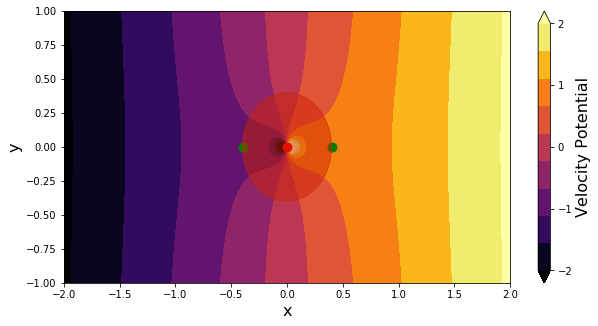

In [21]:
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
phicontf = plt.contourf(X, Y, phi, levels=np.linspace(-2, 2, 10), extend='both', cmap='inferno')
cbar = plt.colorbar(phicontf)
cbar.set_label('Velocity Potential', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0, 2.0])
plt.scatter(x_doublet, y_doublet, color='red', s=80, marker='o')

R = math.sqrt(kappa/(2*math.pi*u_inf))
circle = plt.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
plt.gca().add_patch(circle)

x_stagn1, y_stagn1 = R, 0.0
x_stagn2, y_stagn2 = -R, 0.0
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');

In [24]:
def get_vortex(strength, xv, yv, X, Y):
    u = strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    psi = strength / (4 * math.pi) * np.log((X - xv)**2 + (Y - yv)**2)
    phi = strength / (2 * math.pi) * np.arctan2(X, Y)
    return u, v, psi, phi

In [25]:
gamma = 4.0
x_vortex, y_vortex = 0.0, 0.0

In [26]:
# Compute vortex field (u, v), potential (phi), and streamlines (psi)
u_vortex, v_vortex, psi_vortex, phi_vortex = get_vortex(gamma, x_vortex, y_vortex, X, Y)

In [27]:
# Superposition with cylinder field
u = u + u_vortex
v = v + v_vortex
psi = psi + psi_vortex
phi = phi + phi_vortex

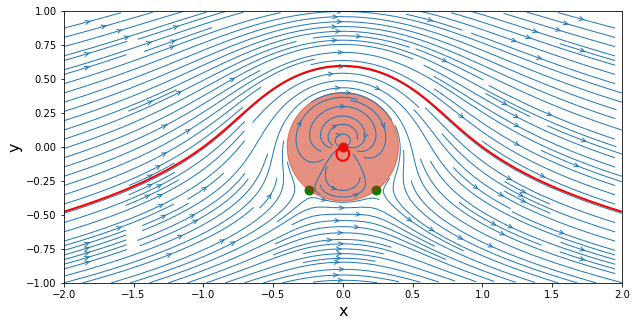

In [29]:
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.contour(X, Y, psi, levels=[0.], colors='red', linewidths=2, linestyles='solid')
plt.scatter(x_doublet, y_doublet, color='red', s=80, marker='o')

# Calculate cylinder radius and add to figure
R = math.sqrt(kappa/(2*math.pi*u_inf))
circle = plt.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
plt.gca().add_patch(circle)

# Calculate stagnation points and add to figure
x_stagn1, y_stagn1 = np.sqrt(R**2 - gamma**2/(16 * np.pi**2 * u_inf**2)), -gamma / (4 * np.pi * u_inf)
x_stagn2, y_stagn2 = -np.sqrt(R**2 - gamma**2/(16 * np.pi**2 * u_inf**2)), -gamma / (4 * np.pi * u_inf)
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');

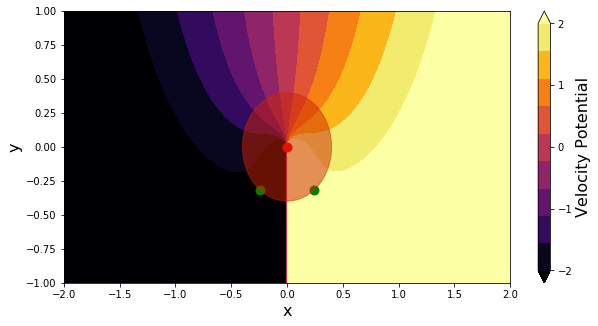

In [30]:
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
phicontf = plt.contourf(X, Y, phi, levels=np.linspace(-2, 2, 10), extend='both', cmap='inferno')
cbar = plt.colorbar(phicontf)
cbar.set_label('Velocity Potential', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0, 2.0])
plt.scatter(x_doublet, y_doublet, color='red', s=80, marker='o')

R = math.sqrt(kappa/(2*math.pi*u_inf))
circle = plt.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
plt.gca().add_patch(circle)

x_stagn1, y_stagn1 = np.sqrt(R**2 - gamma**2/(16 * np.pi**2 * u_inf**2)), -gamma / (4 * np.pi * u_inf)
x_stagn2, y_stagn2 = -np.sqrt(R**2 - gamma**2/(16 * np.pi**2 * u_inf**2)), -gamma / (4 * np.pi * u_inf)
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');

# Pressure Coefficient Field

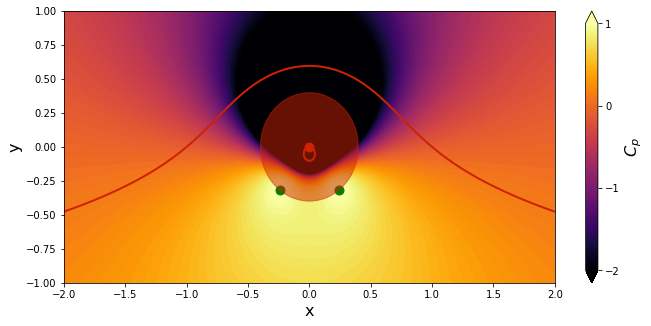

In [35]:
# compute the pressure coefficient field
cp = 1.0 - (u**2 + v**2) / u_inf**2

# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(1.1 * width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
contf = plt.contourf(X, Y, cp, levels=np.linspace(-2.0, 1.0, 100), extend='both', cmap='inferno')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
plt.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')
R = math.sqrt(kappa/(2*math.pi*u_inf))
circle = plt.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
plt.gca().add_patch(circle)
plt.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');

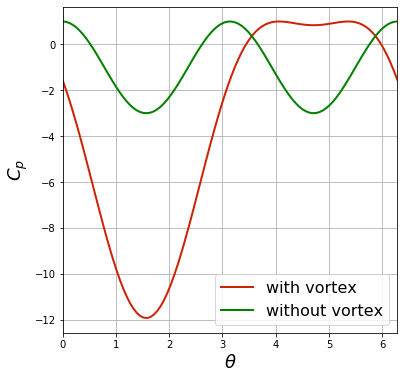

In [38]:
# calculate the surface tangential velocity on the cylinder
theta = np.linspace(0.0, 2 * math.pi, 100)
u_theta = -2 * u_inf * np.sin(theta) - gamma / (2 * math.pi * R)

# compute the surface pressure coefficient
cp = 1.0 - (u_theta / u_inf)**2

# if there was no vortex
u_theta_no_vortex = -2 * u_inf * np.sin(theta)
cp_no_vortex = 1.0 - (u_theta_no_vortex / u_inf)**2

# plot the surface pressure coefficient
size = 6
plt.figure(figsize=(size, size))
plt.grid(True)
plt.xlabel(r'$\theta$', fontsize=18)
plt.ylabel('$C_p$', fontsize=18)
plt.xlim(theta.min(), theta.max())
plt.plot(theta, cp, label='with vortex', color='#CD2305', linewidth=2, linestyle='-')
plt.plot(theta, cp_no_vortex, label='without vortex', color='g', linewidth=2, linestyle='-')
plt.legend(loc='best', prop={'size':16});